# IMPORT DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# import files
fname1 = 'emdat_public_2021_06_24_query_uid-s5YWMa.csv' # EMDAT natural disaster dataset
EMDAT = pd.read_csv(fname1, dtype = 'string')

fname2 = 'CPIAUCNS.csv' # FRED consumer price index dataset
inflation = pd.read_csv(fname2)

In [2]:
# configure plot settings
pd.set_option('display.max_rows', None)

SMALL_SIZE = 10
MEDIUM_SIZE = 15
LARGE_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

# CLEAN DATA

In [3]:
# filter out irrelevant disasters
EMDAT = EMDAT[EMDAT['Disaster Group'] != 'Technological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Extra-terrestrial']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Biological']
EMDAT = EMDAT[EMDAT['Disaster Subgroup'] != 'Complex Disasters']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Epidemic']
EMDAT = EMDAT[EMDAT['Disaster Type'] != 'Mass movement (dry)']

# turn string values into integers
EMDAT['Year'] = [int(year) for year in EMDAT['Year']]
EMDAT['Total Damages'] = EMDAT['Total Damages'].fillna('0')
EMDAT['Total Damages'] = [int(cost) for cost in EMDAT['Total Damages']]
EMDAT['Reconstruction Costs'] = EMDAT['Reconstruction Costs'].fillna('0')
EMDAT['Reconstruction Costs'] = [int(cost) for cost in EMDAT['Reconstruction Costs']]
EMDAT['Insured Damages'] = EMDAT['Insured Damages'].fillna('0')
EMDAT['Insured Damages'] = [int(cost) for cost in EMDAT['Insured Damages']]

# take data from last 40 years as recommended by Centre de Recherche sur L’Epidemiologie des Désastres (CRED)
EMDAT = EMDAT[EMDAT['Year'] >= 1980]
EMDAT = EMDAT[EMDAT['Year'] < 2021]

# filter out irrelevant columns
columns = ['Year', 'Country', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype', 'Total Damages']
data = EMDAT[columns]
# count number of disasters in each year
disaster_counts = data['Year'].value_counts().sort_index()

# get mean CPI and CPI multiplier by year
inflation = inflation.groupby('Year').mean()

# merge tables
data = data.merge(inflation, on = 'Year')

# normalize prices to 2020 prices
data['Total Damages'] = data['Total Damages'] * data['CPI Multiplier']

# set prices from K USD to B USD
data['Total Damages'] = data['Total Damages'] / 1000000

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11909 entries, 0 to 11908
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11909 non-null  int64  
 1   Country              11909 non-null  string 
 2   Disaster Group       11909 non-null  string 
 3   Disaster Subgroup    11909 non-null  string 
 4   Disaster Type        11909 non-null  string 
 5   Disaster Subtype     9776 non-null   string 
 6   Disaster Subsubtype  977 non-null    string 
 7   Total Damages        11909 non-null  float64
 8   CPIAUCNS             11909 non-null  float64
 9   CPI Multiplier       11909 non-null  float64
dtypes: float64(3), int64(1), string(6)
memory usage: 1023.4 KB


In [5]:
data.sort_values('Total Damages', ascending = False).head()

,Year,Country,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Total Damages,CPIAUCNS,CPI Multiplier
8505,2011,Japan,Natural,Geophysical,Earthquake,Tsunami,<NA>,240.858523,224.939167,1.146945
2886,1995,Japan,Natural,Geophysical,Earthquake,Ground movement,<NA>,169.298871,152.383333,1.692989
6388,2005,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,165.146380,195.291667,1.321171
7358,2008,China,Natural,Geophysical,Earthquake,Ground movement,<NA>,101.869476,215.302500,1.198464
10730,2017,United States of America (the),Natural,Meteorological,Storm,Tropical cyclone,<NA>,99.983503,245.119583,1.052458


# SPLIT  DISASTER SUBGROUPS

In [6]:
# display unique subgroups
for subgroup in data['Disaster Subgroup'].unique():
    print(subgroup)

Climatological
Geophysical
Hydrological
Meteorological


In [7]:
# create new dataframes for each subgroup
climatological_data = data[data['Disaster Subgroup'] == 'Climatological']
geophysical_data = data[data['Disaster Subgroup'] == 'Geophysical']
meteorological_data = data[data['Disaster Subgroup'] == 'Meteorological']
hydrological_data = data[data['Disaster Subgroup'] == 'Hydrological']

# count number of disasters in each year for each subgroup
climatological_disaster_counts = climatological_data['Year'].value_counts().sort_index()
geophysical_disaster_counts = geophysical_data['Year'].value_counts().sort_index()
meteorological_disaster_counts = meteorological_data['Year'].value_counts().sort_index()
hydrological_disaster_counts = hydrological_data['Year'].value_counts().sort_index()

# save index of years
disaster_counts_index = disaster_counts.index
climatological_disaster_counts_index = climatological_disaster_counts.index
geophysical_disaster_counts_index = geophysical_disaster_counts.index
meteorological_disaster_counts_index = meteorological_disaster_counts.index
hydrological_disaster_counts_index = hydrological_disaster_counts.index

# PLOT DISASTER SUBGROUPS

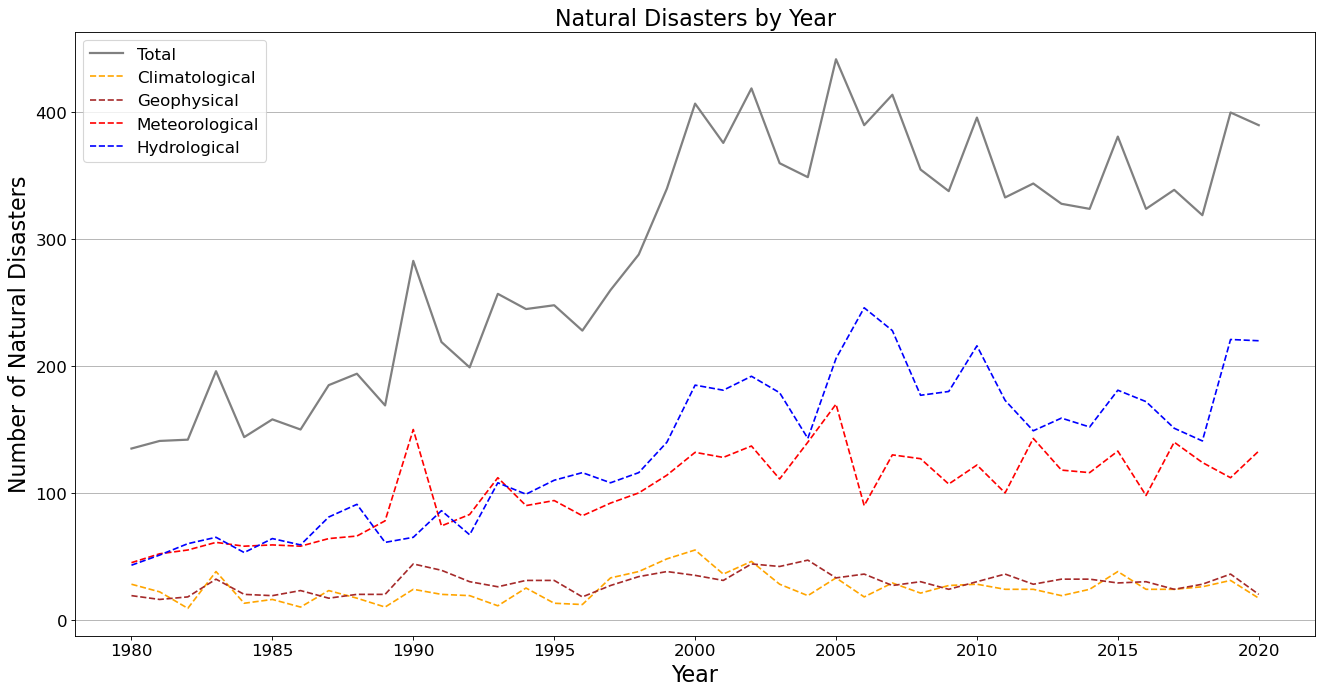

In [8]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Natural Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Natural Disasters")
plt.plot(disaster_counts_index, disaster_counts, linewidth=2, color = 'grey')
plt.plot(climatological_disaster_counts_index, climatological_disaster_counts, linestyle = '--', color = 'orange')
plt.plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linestyle = '--', color = 'brown')
plt.plot(meteorological_disaster_counts_index, meteorological_disaster_counts, linestyle = '--', color = 'red')
plt.plot(hydrological_disaster_counts_index, hydrological_disaster_counts, linestyle = '--', color = 'blue')
plt.legend(['Total', 'Climatological', 'Geophysical', 'Meteorological',  'Hydrological'])

# DISASTER SUBGROUP COSTS

In [9]:
disaster_costs = data[['Year', 'Total Damages']]
disaster_costs = disaster_costs.groupby('Year').sum()
climatological_costs = climatological_data[['Year', 'Total Damages']]
climatological_costs = climatological_costs.groupby('Year').sum()
geophysical_costs = geophysical_data[['Year', 'Total Damages']]
geophysical_costs = geophysical_costs.groupby('Year').sum()
meteorological_costs = meteorological_data[['Year', 'Total Damages']]
meteorological_costs = meteorological_costs.groupby('Year').sum().groupby('Year').sum()
hydrological_costs = hydrological_data[['Year', 'Total Damages']]
hydrological_costs = hydrological_costs.groupby('Year').sum()

In [10]:
japan_tsunami_2011_cost = 2.408585e+02
hurricane_harvey_2017_cost = 9.998350e+01
sichuan_earthquake_2008_cost = 1.018695e+02
hurricane_katrina_2005_cost = 1.651464e+02
izmit_earthquake_1999_cost = 3.097570e+01
kobe_earthquake_1995_cost = 1.692989e+02
irpinia_earthquake_1980_cost = 6.266630e+01

Text(1980.5, 62.6663, 'Irpinia Earthquake')

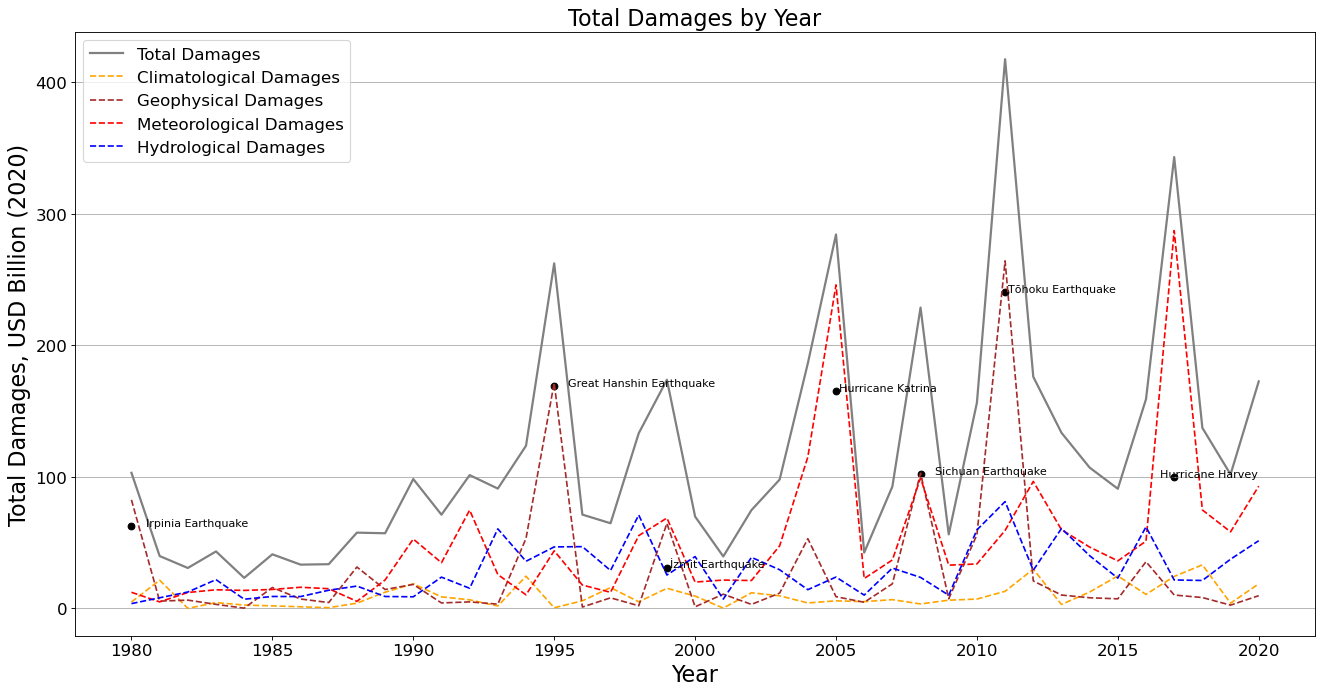

In [11]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Total Damages by Year")
plt.xlabel("Year")
plt.ylabel("Total Damages, USD Billion (2020)")
plt.plot(disaster_costs.index, disaster_costs['Total Damages'], linewidth=2, color = 'grey')
plt.plot(climatological_costs.index, climatological_costs['Total Damages'], linestyle = '--', color = 'orange')
plt.plot(geophysical_costs.index, geophysical_costs['Total Damages'], linestyle = '--', color = 'brown')
plt.plot(meteorological_costs.index, meteorological_costs['Total Damages'], linestyle = '--', color = 'red')
plt.plot(hydrological_costs.index, hydrological_costs['Total Damages'], linestyle = '--', color = 'blue')
plt.legend(['Total Damages', 'Climatological Damages', 'Geophysical Damages', 'Meteorological Damages',  'Hydrological Damages'])

plt.scatter([1980, 1995, 1999, 2005, 2008, 2011, 2017], [irpinia_earthquake_1980_cost, kobe_earthquake_1995_cost,izmit_earthquake_1999_cost,hurricane_katrina_2005_cost,sichuan_earthquake_2008_cost,japan_tsunami_2011_cost, hurricane_harvey_2017_cost], c='black')

plt.annotate("Tōhoku Earthquake", (2011.1, japan_tsunami_2011_cost))
plt.annotate("Hurricane Harvey", (2016.5, hurricane_harvey_2017_cost))
plt.annotate("Sichuan Earthquake", (2008.5, sichuan_earthquake_2008_cost))
plt.annotate("Hurricane Katrina", (2005.1, hurricane_katrina_2005_cost))
plt.annotate("İzmit Earthquake", (1999.1, izmit_earthquake_1999_cost))
plt.annotate("Great Hanshin Earthquake", (1995.5, kobe_earthquake_1995_cost))
plt.annotate("Irpinia Earthquake", (1980.5, irpinia_earthquake_1980_cost))

# BOXPLOT TOTAL DAMAGES BY DECADE

{'whiskers': [<matplotlib.lines.Line2D at 0x22f42a4e988>,
 'caps': [<matplotlib.lines.Line2D at 0x22f42a3b6c8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x22f42a438c8>,
 'medians': [<matplotlib.lines.Line2D at 0x22f42a391c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x22f42a39388>,
 'means': []}

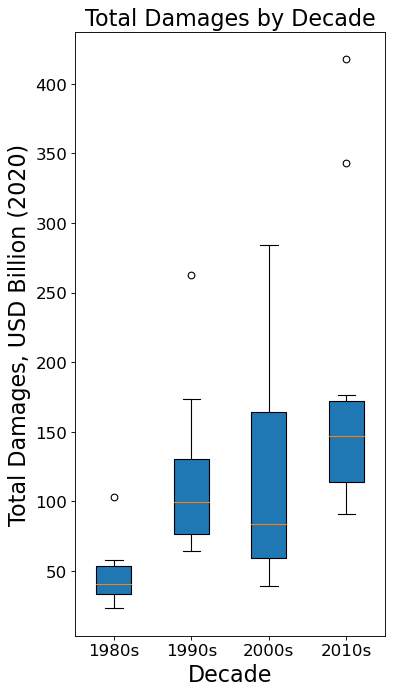

In [12]:
total_box_data = [disaster_costs['Total Damages'][0:10], disaster_costs['Total Damages'][10:20], disaster_costs['Total Damages'][20:30], disaster_costs['Total Damages'][30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Total Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Total Damages, USD Billion (2020)")

plt.boxplot(total_box_data, patch_artist = True, labels = box_labels)


# SPLIT GEOPHYSICAL DISASTERS

In [13]:
# display unique types
for dtype in geophysical_data['Disaster Type'].unique():
    print(dtype)

Earthquake
Volcanic activity


In [14]:
# create new dataframes for each type
earthquake_data = geophysical_data[geophysical_data['Disaster Type'] == 'Earthquake']
volcanic_data = geophysical_data[geophysical_data['Disaster Type'] == 'Volcanic activity']

# count number of disasters in each year for each subgroup
earthquake_disaster_counts = earthquake_data['Year'].value_counts().sort_index()
volcanic_disaster_counts = volcanic_data['Year'].value_counts().sort_index()

# save index of years
earthquake_disaster_counts_index = earthquake_disaster_counts.index
volcanic_disaster_counts_index = volcanic_disaster_counts.index

# PLOT GEOPHYSICAL DISASTERS

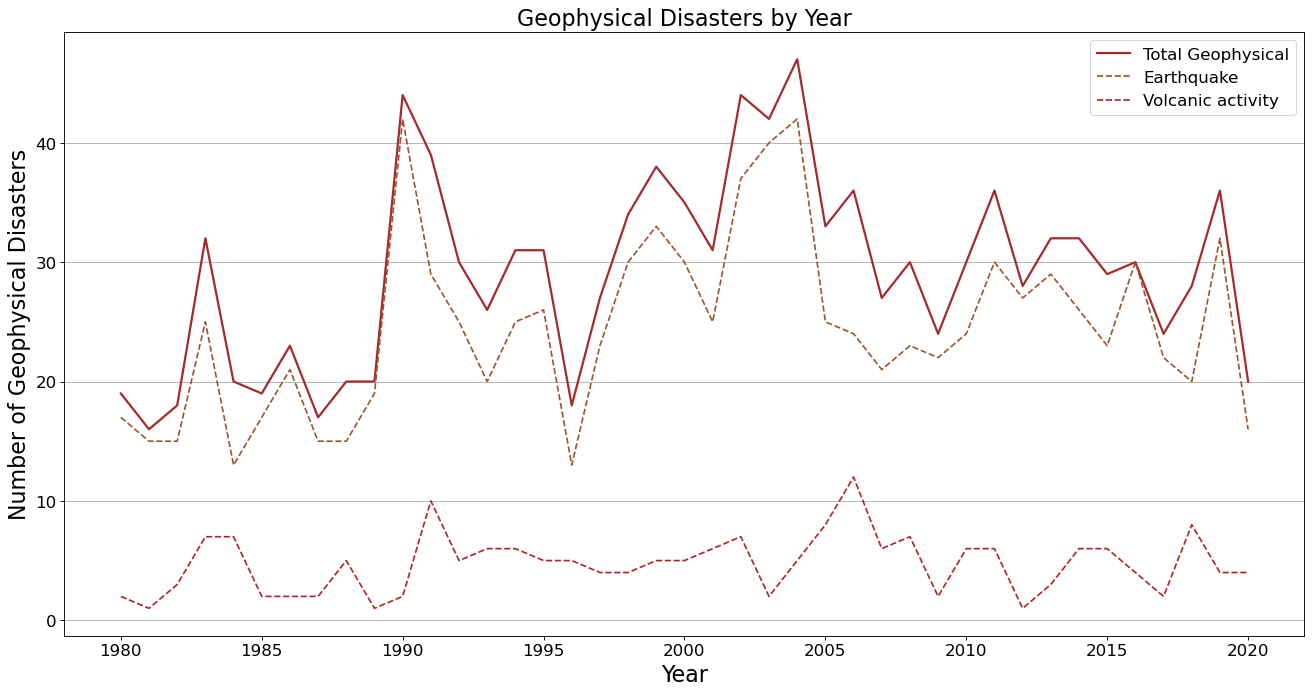

In [15]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Geophysical Disasters by Year")
plt.xlabel("Year")
plt.ylabel("Number of Geophysical Disasters")
plt.plot(geophysical_disaster_counts_index, geophysical_disaster_counts, linewidth=2, color = 'brown')
plt.plot(earthquake_disaster_counts_index, earthquake_disaster_counts, linestyle = '--', color = 'sienna')
plt.plot(volcanic_disaster_counts_index, volcanic_disaster_counts, linestyle = '--', color = 'firebrick')

plt.legend(['Total Geophysical', 'Earthquake', 'Volcanic activity'])

# GEOPHYSICAL DISASTER COSTS

In [16]:
earthquake_costs = earthquake_data[['Year', 'Total Damages']]
earthquake_costs = earthquake_costs.groupby('Year').sum()

volcanic_costs = volcanic_data[['Year', 'Total Damages']]
volcanic_costs = volcanic_costs.groupby('Year').sum()

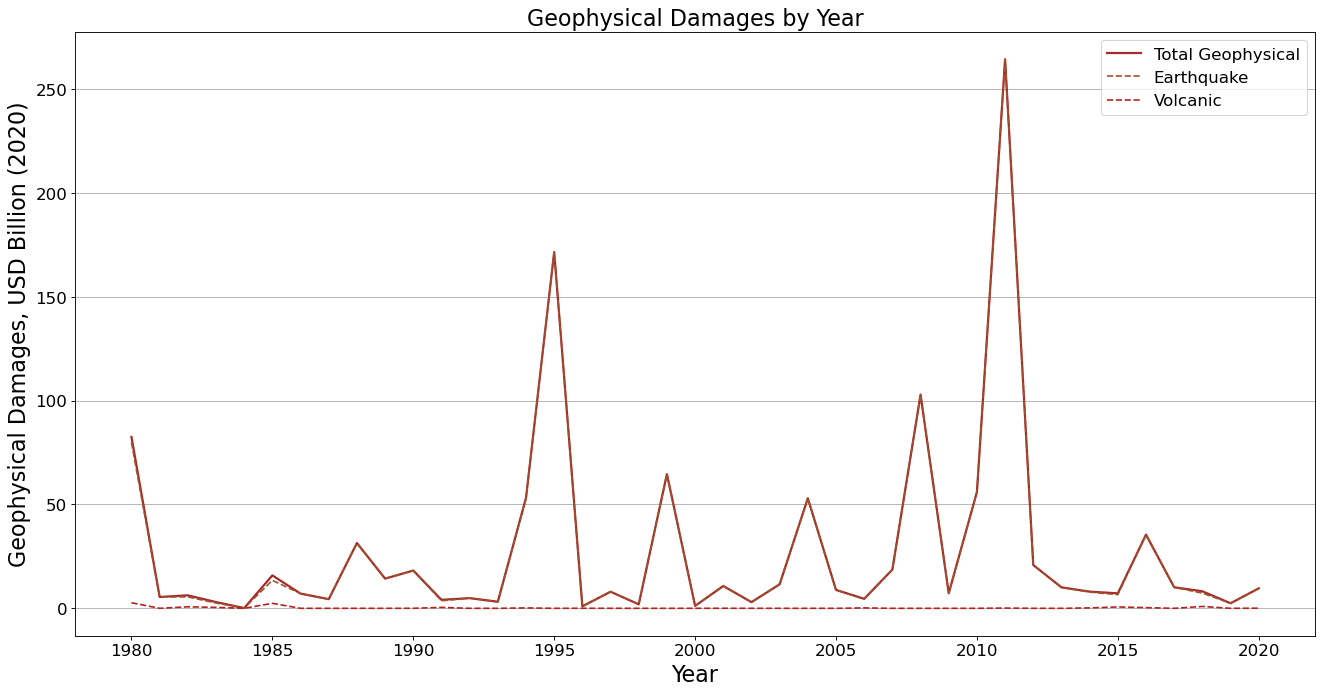

In [17]:
plt.figure(figsize=(20,10), dpi=80)
plt.grid(axis = 'y')
plt.title("Geophysical Damages by Year")
plt.xlabel("Year")
plt.ylabel("Geophysical Damages, USD Billion (2020)")
plt.plot(geophysical_costs.index, geophysical_costs['Total Damages'], linewidth=2, color = 'brown')
plt.plot(earthquake_costs.index, earthquake_costs['Total Damages'], linestyle = '--', color = 'sienna')
plt.plot(volcanic_costs.index, volcanic_costs['Total Damages'], linestyle = '--', color = 'firebrick')

plt.legend(['Total Geophysical', 'Earthquake', 'Volcanic'])

# BOXPLOT GEOPHYSICAL DAMAGES BY DECADE

{'whiskers': [<matplotlib.lines.Line2D at 0x22f42d726c8>,
 'caps': [<matplotlib.lines.Line2D at 0x22f42d8d388>,
 'boxes': [<matplotlib.lines.Line2D at 0x22f42991a08>,
 'medians': [<matplotlib.lines.Line2D at 0x22f42d8c7c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x22f42d88308>,
 'means': []}

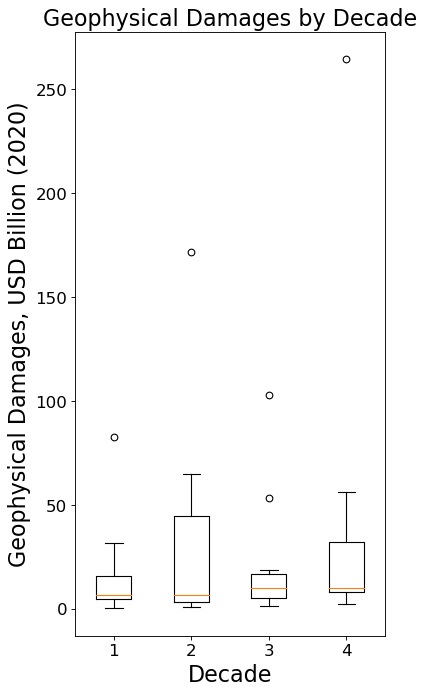

In [18]:
geophysical_box_data = [geophysical_costs['Total Damages'][0:10], geophysical_costs['Total Damages'][10:20], geophysical_costs['Total Damages'][20:30], geophysical_costs['Total Damages'][30:40]]
box_labels = ['1980s', '1990s', '2000s', '2010s']

plt.figure(figsize=(5,10), dpi=80)
plt.title("Geophysical Damages by Decade")
plt.xlabel("Decade")
plt.ylabel("Geophysical Damages, USD Billion (2020)")

plt.boxplot(geophysical_box_data)